## 场景说明

在进行车道线检测时，检测出来的通常是一系列的线段。所以，我需要将线段连接起来，即Extrapolate Line。
下面我就来简单说下几种extrapolate line的方法。

### 引用模块

需要用到的模块，统一引用如下。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 原始数据

In [10]:
# 数据格式：x1,y1,x2,y2;...
# 即每一个line segment由(x1,y1), (x2,y2)表示；segment之间由`;`区分
points = "183,535,344,410;162,538,436,339;713,446,873,538;702,448,852,538;362,398,409,362;521,333,544,346;411,362,438,341;162,539,437,339;569,365,585,375;570,363,591,374;701,446,717,456;710,445,746,466;572,363,588,372;315,434,387,378;177,538,189,530;569,364,589,376;709,452,742,471;574,363,591,373;847,524,873,539;405,366,415,358;219,506,244,487;723,452,786,489;815,515,834,527;185,532,195,525;243,487,304,442;793,493,853,527"

### 观察数据特点

我使用散点图观察数据。

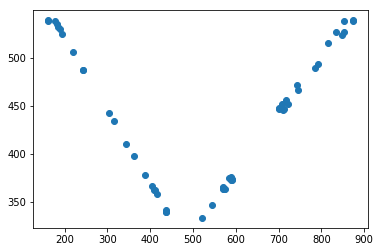

In [12]:
points = []
X = []  # x point collection
Y = []  # y point collection

for l in lines:
    p = list(map(lambda item: int(item),l.split(",")))
    points.append(p)
    X.append(p[0])
    X.append(p[2])
    Y.append(p[1])
    Y.append(p[3])

import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.savefig("line_points.png")

对于实际场景而言，车道线是反过来的，即以X轴向上翻转180度。因为，摄像头拍的图片，其坐标是在左上角的。但不防碍我们的学习。

通过观察发现，图中的主要为两条，分为左边线和右边线。这也符合车载摄像头的视角。所以，需要先将线段聚类。

我选择使用斜率slope来区分左边线和右边线。slope为负则为左边线，slope为正，则为右边线。

### 聚类

我选择使用斜率slope来区分左边线和右边线。slope为负则为左边线，slope为正，则为右边线。

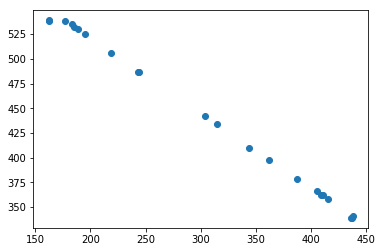

In [13]:
left_x = []  # 左边线X集合
left_y = []  # 右边线Y集合
right_x = []  # 右边线X集合
right_y = []  # 右边线Y集合
for p in points:
    if p[2] == p[0]:
        continue

    slope = (p[3] - p[1]) / (p[2] - p[0])
    if slope < 0:
        left_x.append(p[0])
        left_x.append(p[2])
        left_y.append(p[1])
        left_y.append(p[3])
    else:
        right_x.append(p[0])
        right_x.append(p[2])
        right_y.append(p[1])
        right_y.append(p[3])

import matplotlib.pyplot as plt

plt.scatter(left_x, left_y)
plt.savefig("line_points.png")

### 多项式拟合

多项式可以用于表达直线以及曲线，功能强大。我选择使用多项式拟合直线。

```math
f(x) = p_0 + p_1*x^1 + p_2*x^2 + ...
```

[numpy polyfit多项式拟合帮助文档](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html)

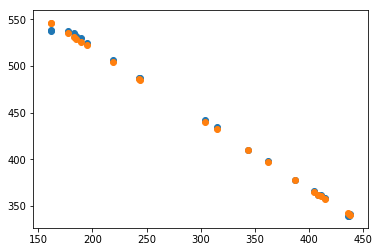

In [27]:
import numpy as np
z = np.polyfit(left_x, left_y, deg=1)
p = np.poly1d(z)
left_y_s = list(map(lambda x: [x, p(x)], left_x))
plt.scatter(left_x, left_y)
plt.scatter(left_x, [int(y[1]) for y in left_y_s])
plt.savefig("x.png")

## Draw line

In [30]:
# 获取直线的两端
min_index = np.argmin(left_y_s, axis=0)[1]
max_index = np.argmax(left_y_s, axis=0)[1]
min_point = left_y_s[min_index]
max_point = left_y_s[max_index]

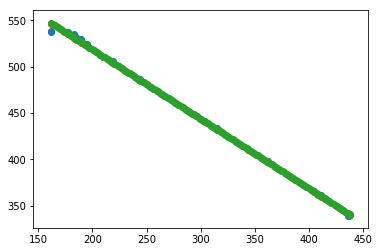

In [29]:
import numpy as np
left_X = np.linspace(max_point[0], min_point[0], int(min_point[0] - max_point[0]))
left_Y = list(map(lambda x: p(x), left_X))
plt.scatter(left_x, left_y)
plt.scatter(left_x, [int(y[1]) for y in left_y_s])
plt.scatter(left_X, left_Y)
plt.savefig("x.png")

## 总结

本文处理extrapolate line的pipeline如下:
* 初步观察数据特点
* 基于slope聚类
* 多项式拟合(numpy.ployfit)
* 作图，直观看下效果